In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

classeDois = pd.read_csv('../Data/rocket_league_skillshots.data', sep=' ')

features = ["BallAcceleration","Time","DistanceWall","DistanceCeil",
            "DistanceBall","PlayerSpeed", "BallSpeed","up","boost",
            "down","jump"]

'''
BallAcelleration = media
Time = tempo final
DistanceWall = variância
DistanceCeil = variância
DistanceBall = variância
PlayerSpeed = média
BallSpeed = média
up = somatório
boost = somatório
down = somatório
jump = somatório
'''

dataset = classeDois[features]

matrizFinal = []
classe = 0
qtdLinhas = 0
timeFinal = 0

for i in range(len(dataset)):
    if pd.isna(dataset.iloc[i,1]) or i == len(dataset) - 1:
        if qtdLinhas > 0:
            matrizFinal.append([dataset.iloc[i-qtdLinhas:i,0].mean(), timeFinal, dataset.iloc[i-qtdLinhas:i,2].var(),
                                dataset.iloc[i-qtdLinhas:i,3].var(),
                                dataset.iloc[i-qtdLinhas:i,4].var(), dataset.iloc[i-qtdLinhas:i,5].mean(),
                                dataset.iloc[i-qtdLinhas:i,6].mean(), dataset.iloc[i-qtdLinhas:i,7].sum(),
                                dataset.iloc[i-qtdLinhas:i,8].sum(),
                                dataset.iloc[i-qtdLinhas:i,9].sum(), dataset.iloc[i-qtdLinhas:i,10].sum(),
                                classe])
        classe = dataset.iloc[i,0]
        qtdLinhas = 0
        timeFinal = 0
    else:
        qtdLinhas += 1
        timeFinal = dataset.iloc[i,1]

finalFeatures = features + ["classe"]
processedData = pd.DataFrame(matrizFinal,columns=finalFeatures)
processedData.head()

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,up,boost,down,jump,classe
0,-3853.867885,5.070104,3.059738e+04,6917.679671,3.546207e+06,152961.454638,129791.809510,0.0,7.0,0.0,9.0,6.0
1,-848.813985,8.161284,1.981624e+06,561237.455429,1.326933e+06,147893.764224,96963.150194,1.0,8.0,0.0,10.0,-1.0
2,-1264.766385,8.130110,2.308898e+06,564614.846333,1.084948e+06,147510.308898,96556.211527,0.0,10.0,0.0,7.0,-1.0
3,-2133.341430,3.610510,9.436052e+05,176821.531636,1.358482e+05,171583.561188,121592.704957,0.0,7.0,0.0,11.0,-1.0
4,-7148.505767,3.681763,1.537356e+04,857.226355,1.308056e+06,163413.423195,149543.364532,1.0,8.0,0.0,5.0,-1.0


In [2]:
processedData.describe()

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,up,boost,down,jump,classe
count,298.000000,298.000000,2.980000e+02,2.980000e+02,2.980000e+02,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,-4452.819314,4.074706,2.543351e+07,1.044325e+05,2.009341e+06,154533.729820,123599.619123,0.929530,6.077181,0.238255,9.436242,3.268456
std,4767.413370,1.704921,3.068464e+08,2.082541e+05,1.705919e+06,30163.620006,42925.508545,1.722812,4.194443,1.038135,6.683133,2.605694
min,-26128.652035,1.009000,0.000000e+00,5.686867e-26,3.321846e-02,400.374959,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,-6807.479333,2.785029,3.238837e+04,1.177797e+03,7.241118e+05,140020.088387,108000.574347,0.000000,3.000000,0.000000,4.000000,2.000000
50%,-4064.452173,3.940157,1.060573e+05,3.328337e+03,1.542971e+06,155827.752649,129459.608099,0.000000,6.000000,0.000000,9.000000,3.000000
75%,-1295.464847,5.015213,1.340235e+06,1.520008e+05,3.026675e+06,172907.893940,147342.590456,1.000000,9.000000,0.000000,13.000000,6.000000
max,11599.404268,13.470363,4.805408e+09,2.203612e+06,7.306665e+06,228114.832665,210877.285380,8.000000,20.000000,9.000000,37.000000,7.000000


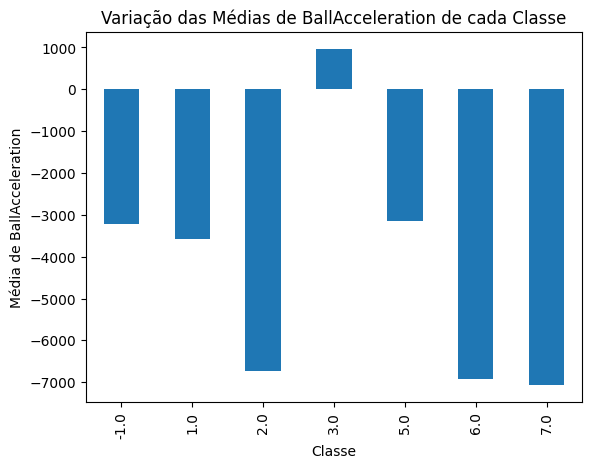

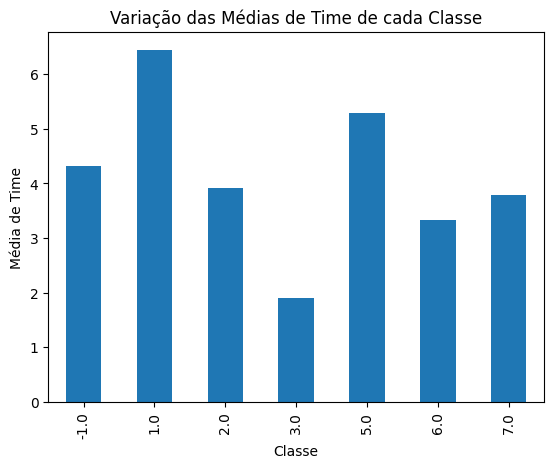

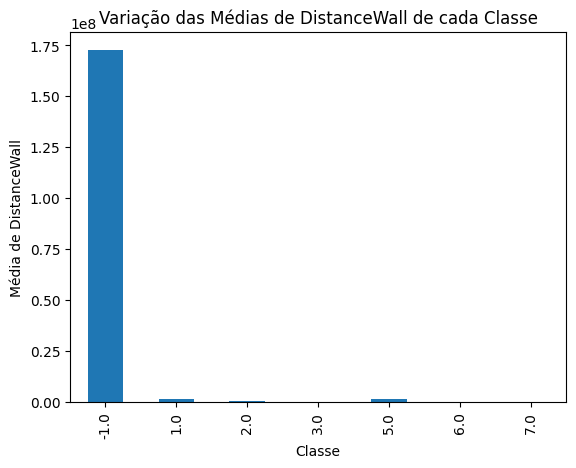

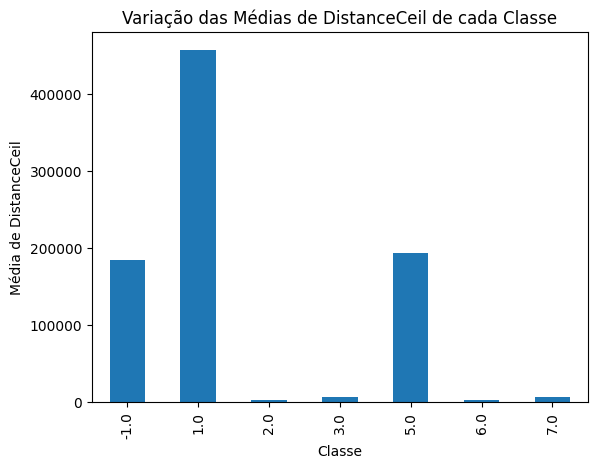

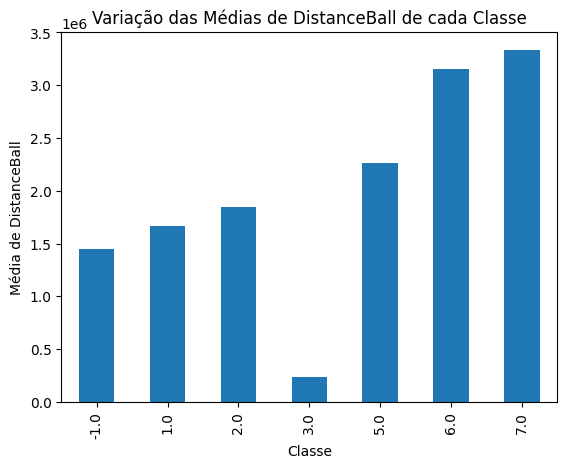

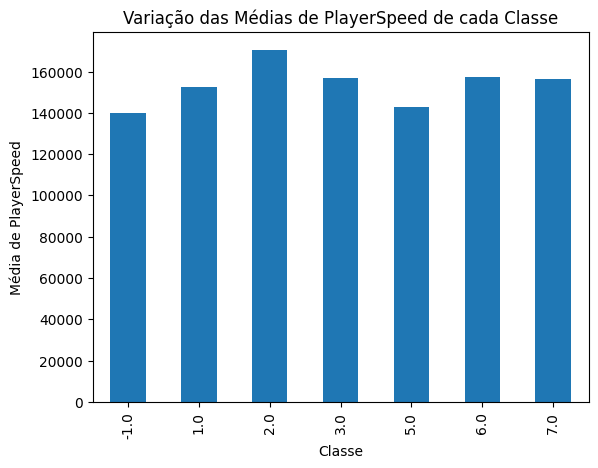

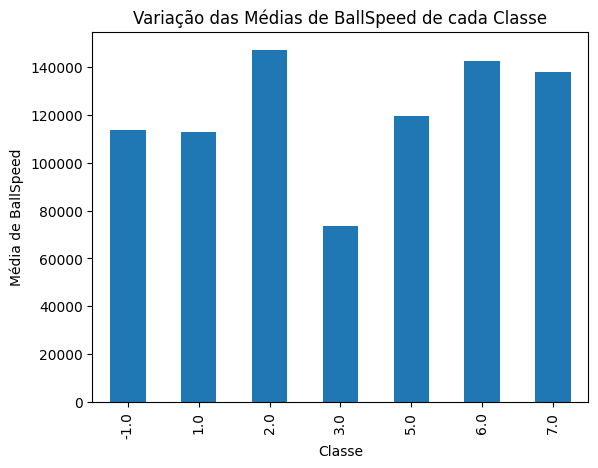

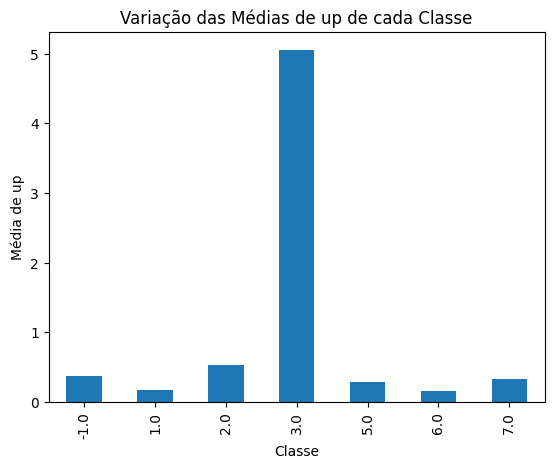

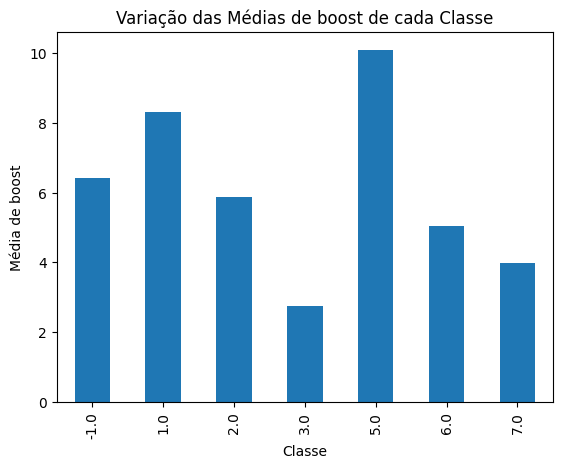

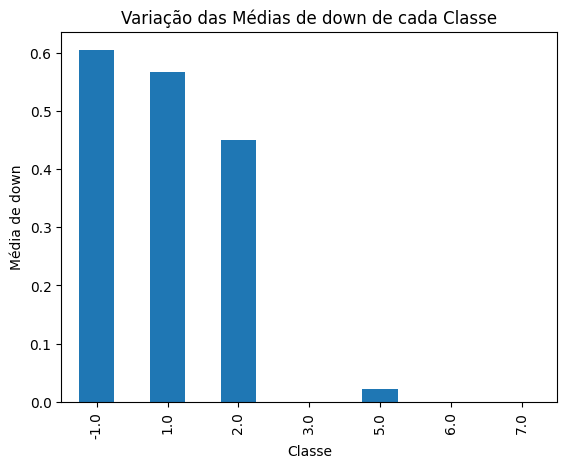

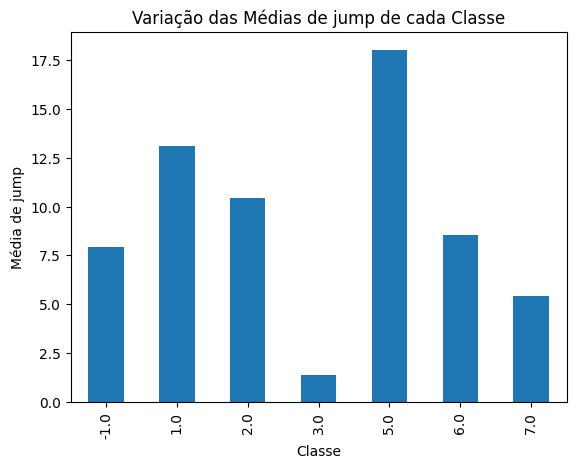

In [3]:
results = []

test_sizes = np.arange(0.1, 0.91, 0.01)

for attribute in processedData.columns[:-1]:
    class_means = processedData.groupby('classe')[attribute].mean()
    class_means.plot(kind='bar')
    plt.xlabel('Classe')
    plt.ylabel(f'Média de {attribute}')
    plt.title(f'Variação das Médias de {attribute} de cada Classe')
    plt.show()

In [4]:
Y = processedData.classe
X = processedData.drop(['classe'], axis=1)

for test_size in test_sizes:
  acc_list = []
  for i in range(1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)
    model = GaussianNB()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    acc_list.append(accuracy_score(Y_test,Y_pred))
  results.append(acc_list)

/tmp/ipykernel_127205/3567221120.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(results, labels=[f"{size*100:.0f}%" for size in test_sizes])


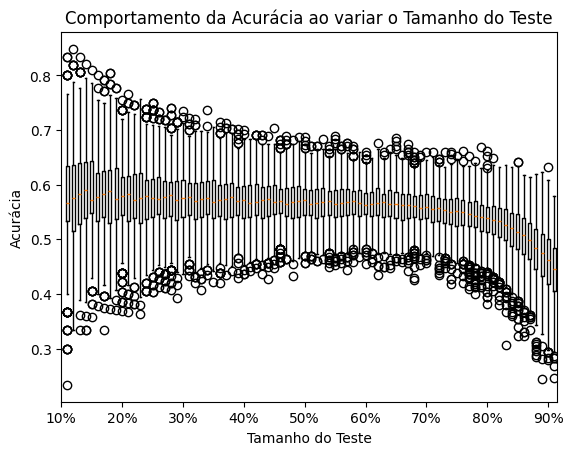

/tmp/ipykernel_127205/3567221120.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax_sel.boxplot(results_sel, labels=[f"{size*100:.0f}%" for size in test_sizes_sel])


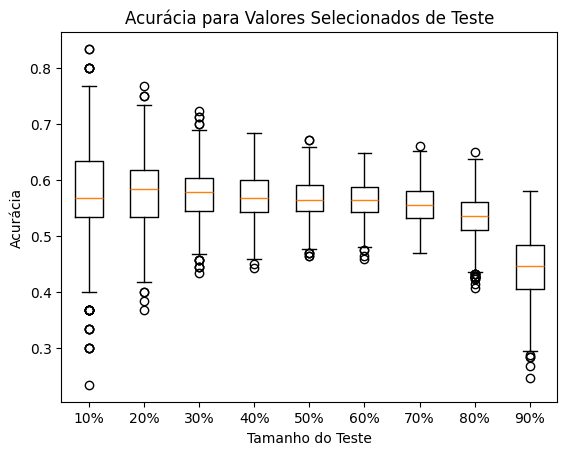

In [5]:
fig, ax = plt.subplots()
ax.boxplot(results, labels=[f"{size*100:.0f}%" for size in test_sizes])
plt.xlabel('Tamanho do Teste')
ax.set_xticks(np.arange(0, len(test_sizes), 10))
ax.set_xticklabels([f"{size*100:.0f}%" for size in test_sizes[::10]])
plt.ylabel('Acurácia')
plt.title('Comportamento da Acurácia ao variar o Tamanho do Teste')

plt.show()

sel_ids = np.linspace(0, len(test_sizes) - 1, 9, dtype=int)
test_sizes_sel = test_sizes[sel_ids]
results_sel = [results[i] for i in sel_ids]

fig_sel, ax_sel = plt.subplots()
ax_sel.boxplot(results_sel, labels=[f"{size*100:.0f}%" for size in test_sizes_sel])
plt.xlabel('Tamanho do Teste')
plt.ylabel('Acurácia')
plt.title('Acurácia para Valores Selecionados de Teste')

plt.show()